### Anova

Anova is an extension of T-Test. 

We do Anova test when we have more than 2 samples to test.

In Anova we do F-Test.

In F-Test, We see F-table for Critical Values - there is degrees of freedom in numerator and degrees of freedom in 
denominator.

In Anova test, we check variances between two or more samples/groups.

F distribution/ Anova test is always assumed to be right skewed(positively skewed in nature).

Parameters of Fdistribution are deg. of freedom of num and deg. of freedom of denom.

F table holds three metrics-  dfn,dfd, alpha

In [1]:
import numpy as np
import scipy.stats as scipy
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sms
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
scipy.f.ppf(q=1-0.05,dfn=2,dfd=12)
# dfn - deg. of freedom in numerator
# dfd - deg. of freedom in denominator
# q is the the confidence level meaning : 1-alpha

3.8852938346523933

### Example1:-
##### Car crash test for pressure on the skull
##### National Transportation Safety Board Data
We wish to identify whether the mean pressure applied to the driver during a car crash is same in all sengments keeping alpha = 0.05

In [3]:
mean_pressure_hatchback_cars = [643,655,702]
mean_pressure_sedan_cars = [469,427,525]
mean_pressure_SUV_cars = [484,456,402]

In [4]:
cars_type_mp = pd.DataFrame({"Car_Type":["Hatch back","Hatch back","Hatch back","Sedan","Sedan","Sedan","SUV","SUV","SUV"],"Mean_Pressures":[643,655,702,469,427,525,484,456,402]})
cars_type_mp

,Car_Type,Mean_Pressures
0,Hatch back,643
1,Hatch back,655
2,Hatch back,702
3,Sedan,469
4,Sedan,427
5,Sedan,525
6,SUV,484
7,SUV,456
8,SUV,402


Step1- H0: Mean Pressure on skull(hatchback)=Mean Pressure on skull(Sedan)=Mean Pressure on skull(SUV)

Step2- H1: Mean Pressure on skull(hatchback)!=Mean Pressure on skull(Sedan)!=Mean Pressure on skull(SUV) or 
    mean pressure on skull of at least one car type is more than the others.
    
Step3 - Its a right tail(positively skewed) test. - Anova Test - F - test

In [5]:
# Step4- F Critical Value
f_cv = scipy.f.isf(0.05,dfn=2,dfd=6)
print("F critical value is:",f_cv)

F critical value is: 5.143252849784718


Step5- Find Fstatistic
F statistic is found using Anova Table
We use statsmodels.formuli.api import ols (Ordinary Least Square) to make the Anova table to find the Fstats.

In [6]:
# Fitting Anova model using OLS
model = ols("Mean_Pressures~Car_Type",data= cars_type_mp).fit()

In [7]:
print(sm.stats.anova_lm(model))

           df        sum_sq       mean_sq          F    PR(>F)
Car_Type  2.0  86049.555556  43024.777778  25.175411  0.001207
Residual  6.0  10254.000000   1709.000000        NaN       NaN


By looking at the P value in the above model, we figure out that there is less than 1%(0.0012%) probability(chance) of the mean pressures of the different car types being same.

##### Step-6 - Conclusion
We can see Fstats is 25.17 and the Fcv is 5.14. The Fstats is much higher than the Fcv, which means we will reject the 
null hypothesis. So it means all the car types mean pressures are not the same. We accept the alternate hypothesis.
PR is the pvalue which is 0.001207 which is way less than our alpha(error)=0.05 so we reject the null hypothesis and 
accept the alternate hypothesis.

Now, since we know at least one car type has a different mean pressure impact on the skull, hence we are interested in knmowing which car type it is...

In order to know this, we need to conduct the POST HOC TEST and the mostly conducted test is called PAIRWISE TUKEY TEST.

#### POST HOC TEST

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
print(pairwise_tukeyhsd(cars_type_mp["Mean_Pressures"],cars_type_mp["Car_Type"]))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1   group2  meandiff p-adj    lower     upper   reject
-------------------------------------------------------------
Hatch back    SUV -219.3333 0.0015 -322.7791 -115.8876   True
Hatch back  Sedan    -193.0  0.003 -296.4458  -89.5542   True
       SUV  Sedan   26.3333 0.7172  -77.1124  129.7791  False
-------------------------------------------------------------


#### Conclusion for POST HOC TEST
Since we see that the Hatchback has the maximum mean difference with Sedan and SUV cars and we also see that the Hypothesis Rejection is TRUE for these car segments and hence we can conclude that thr hatchback appears to be the most vulnerable segment to go with.

### Example2:-
##### Gym Income:-
#### Perform a Hypothesis Test to see if mean income of store are equal?!

In [10]:
gym_store1 = [60,65,66,55,62,70,51,72,58,61,71,41,70,57,55,63,64,76,74,54,58,73]
gym_store2 = [56,65,63,57,47,72,56,52,75,66,62,68,75,60,73,63,64,65]
gym_store3 = [67,56,65,61,63,59,42,53,63,65,60,57,62,70,73,63,55,52,58,68,70,72,45]

In [11]:
gym1 = pd.DataFrame({"Gym":"G1","Monthly_Income":gym_store1})
gym2 = pd.DataFrame({"Gym":"G2","Monthly_Income":gym_store2})
gym3 = pd.DataFrame({"Gym":"G3","Monthly_Income":gym_store3})
gym_income = pd.DataFrame()
gym_income = gym_income.append(gym1) 
gym_income = gym_income.append(gym2)
gym_income = gym_income.append(gym3)
gym_income

,Gym,Monthly_Income
0,G1,60
1,G1,65
2,G1,66
3,G1,55
4,G1,62
5,G1,70
6,G1,51
7,G1,72
8,G1,58
9,G1,61


Step 1 - H0: Monthly_Income(Gym1)=Monthly_Income(Gym1)=Monthly_Income(Gym3)

Step 2 - H1: Monthly_Income(Gym1)!=Monthly_Income(Gym1)!=Monthly_Income(Gym3)

In [12]:
dfn = 2
print("dfn is:", dfn)
dfd = len(gym_store1)+len(gym_store2)+len(gym_store3)-3
print("dfd is:",dfd)

dfn is: 2
dfd is: 60


In [13]:
#Step3 - Critical Value
cv = scipy.f.isf(0.05,2,60)
print("CV is:",cv)

CV is: 3.1504113105827303


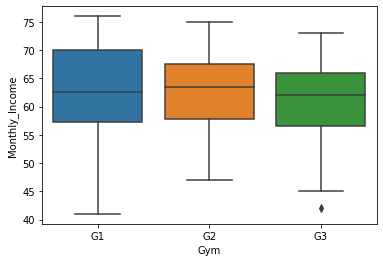

In [14]:
sns.boxplot(x="Gym",y="Monthly_Income",data=gym_income)
plt.show()

In [15]:
# Step4 - Anova Test as we have more than 2 samples.
# Calculate F Statistics

In [16]:
# Fitting Anova model using OLS
model = ols("Monthly_Income~Gym",data= gym_income).fit()

In [17]:
print(sm.stats.anova_lm(model))

            df       sum_sq    mean_sq         F   PR(>F)
Gym        2.0    66.614123  33.307061  0.497075  0.61079
Residual  60.0  4020.370004  67.006167       NaN      NaN


Step5: Conclusion

Since the p-value states that there is a 61.079 % probability that the gym income of all stores is same and the same can 
be seen by F statistics. Hence we fail to reject the Null Hypothesis (H0).

#### POST HOC TEST

In [18]:
print(pairwise_tukeyhsd(gym_income["Monthly_Income"],gym_income["Gym"]))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    G1     G2   0.7323    0.9 -5.5198 6.9844  False
    G1     G3  -1.7194 0.7423 -7.5858 4.1471  False
    G2     G3  -2.4517  0.602 -8.6423 3.7389  False
---------------------------------------------------


#### Homework

The Data comes from an electronic store showing the percentage of customers satisfied with the quality of service.

Conduct a two way Anova and draw a inference about the population mean of service corresponding to the days as well as stores.

In [19]:
table1 = [["Day","Store-A","Store-B","Store-C","Store-D","Store-E"],[1,79,81,74,77,76],[2,78,86,89,97,86],[3,81,87,84,94,82],
         [4,80,83,81,88,83],[5,70,74,77,89,68]]
table1

[['Day', 'Store-A', 'Store-B', 'Store-C', 'Store-D', 'Store-E'],
 [1, 79, 81, 74, 77, 76],
 [2, 78, 86, 89, 97, 86],
 [3, 81, 87, 84, 94, 82],
 [4, 80, 83, 81, 88, 83],
 [5, 70, 74, 77, 89, 68]]

In [20]:
table2 = pd.DataFrame(table1[1:],columns=table1[0])
table2

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
0,1,79,81,74,77,76
1,2,78,86,89,97,86
2,3,81,87,84,94,82
3,4,80,83,81,88,83
4,5,70,74,77,89,68


In [21]:
table_melt = pd.melt(table2,id_vars=["Day"],var_name="Store_Type",value_name="Quality_Score",
        value_vars=["Store-A","Store-B","Store-C","Store-D","Store-E"])
table_melt

,Day,Store_Type,Quality_Score
0,1,Store-A,79
1,2,Store-A,78
2,3,Store-A,81
3,4,Store-A,80
4,5,Store-A,70
5,1,Store-B,81
6,2,Store-B,86
7,3,Store-B,87
8,4,Store-B,83
9,5,Store-B,74


#### Two Way Anova F-Test

Step1 - H0: The percentage of customers satisfied with the quality of service is equal of every store type.

Step2 - H1: The percentage of customers satisfied with the quality of service is not equal of every store type.

Step3 - Identify test - Anova(F-Test),Right Tail Test

Step4 - Finding Critical Value

In [22]:
n = 5
dfn = n-1
print("dfn is:",dfn)
dfd = len(table_melt)-5
print("dfd is:",dfd)

dfn is: 4
dfd is: 20


In [23]:
# Step4 - 
f_cv = scipy.f.isf(0.05,dfn,dfd)
print("F Critical Value is:",f_cv)

F Critical Value is: 2.8660814020156584


##### F-Test

In [24]:
# fstats

In [25]:
model7 = ols("Quality_Score~Store_Type",data= table_melt).fit()

In [26]:
print(sm.stats.anova_lm(model7))

              df  sum_sq  mean_sq         F    PR(>F)
Store_Type   4.0  390.56    97.64  2.569474  0.069495
Residual    20.0  760.00    38.00       NaN       NaN


In [ ]:
# We can see that the Fstats is 

#### POST HOC TEST

In [27]:
print(pairwise_tukeyhsd(table_melt["Quality_Score"],table_melt["Store_Type"]))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
Store-A Store-B      4.6 0.7393  -7.0673 16.2673  False
Store-A Store-C      3.4    0.9  -8.2673 15.0673  False
Store-A Store-D     11.4 0.0575  -0.2673 23.0673  False
Store-A Store-E      1.4    0.9 -10.2673 13.0673  False
Store-B Store-C     -1.2    0.9 -12.8673 10.4673  False
Store-B Store-D      6.8 0.4329  -4.8673 18.4673  False
Store-B Store-E     -3.2    0.9 -14.8673  8.4673  False
Store-C Store-D      8.0 0.2788  -3.6673 19.6673  False
Store-C Store-E     -2.0    0.9 -13.6673  9.6673  False
Store-D Store-E    -10.0 0.1158 -21.6673  1.6673  False
-------------------------------------------------------


In [28]:
print(pairwise_tukeyhsd(table_melt["Quality_Score"],table_melt["Day"]))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      9.8 0.0818  -0.8765 20.4765  False
     1      3      8.2 0.1864  -2.4765 18.8765  False
     1      4      5.6 0.5291  -5.0765 16.2765  False
     1      5     -1.8    0.9 -12.4765  8.8765  False
     2      3     -1.6    0.9 -12.2765  9.0765  False
     2      4     -4.2 0.7407 -14.8765  6.4765  False
     2      5    -11.6 0.0291 -22.2765 -0.9235   True
     3      4     -2.6    0.9 -13.2765  8.0765  False
     3      5    -10.0 0.0733 -20.6765  0.6765  False
     4      5     -7.4 0.2693 -18.0765  3.2765  False
-----------------------------------------------------
